# Project 1: SAT & ACT Analysis

## Problem Statement

The objective of this project has been to analyze the SAT & ACT data available for 2017 and 2018. The data comprises of participation rates per state wherever available and the individual state avaerage scores. The data has been cleaned, analyzed and looked for useful information that would help understand why some states prefer one of the two exams. 

## Executive Summary 
I need to figure out how to make these links.
### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [122]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [123]:
# Reading the files using pandas
sat_2017 = pd.read_csv("./../data/sat_2017.csv")
act_2017 = pd.read_csv("./../data/act_2017.csv")

In [124]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [125]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [126]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [127]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The sat_2017.csv and act_2017.csv files provide the state-wise average scores in the respective sections and their percentage participation. 

#### 4a. Does the data look complete? 

In [128]:
print(len(sat_2017['State']) , len(act_2017['State']))

51 52


In [129]:
sat_set = set(sat_2017['State'])
act_set = set(act_2017['State'])
print(sat_set.difference(act_set),act_set.difference(sat_set))
missing_state = act_set.difference(sat_set)

set() {'National'}


Answer: The sat_2017.csv has a missing state. It reports only 51 states. act_2017.csv has an extra state named as 'National'

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [130]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [131]:
print(sat_2017[min(sat_2017['Math']) == sat_2017['Math']])

       State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060


In [132]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Answer: The mimimum score that may be scored in a section of the SAT is 200, however, our data shows a minimum of 52 corresponding to state of Maryland. We could correct this incorrect entry using the total score and other subject score. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [133]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [134]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [135]:
# Change all the column names to lowercase
name_change_dict_sat = {'State':'state',
                        'Participation':'participation',
                        'Evidence-Based Reading and Writing':'reasoning',
                        'Math':'math',
                        'Total':'total'}
name_change_dict_act = {'State':'state',
                        'Participation':'participation',
                        'English':'english',
                        'Math':'math',
                        'Reading':'reading',
                        'Science':'science',
                        'Composite':'Composite'.lower()}

In [136]:
sat_2017.rename(columns=name_change_dict_sat, inplace = True)

In [137]:
act_2017.rename(columns=name_change_dict_act, inplace = True)

In [138]:
#code
sat_2017.loc[sat_2017['state'] == 'Maryland','math'] = sat_2017.loc[sat_2017['state'] == 'Maryland','total'] - sat_2017.loc[sat_2017['state'] == 'Maryland']['reasoning']


In [139]:
sat_2017.loc[sat_2017['state']=='Maryland',:]

,state,participation,reasoning,math,total
20,Maryland,69%,536,524,1060


In [140]:
sat_2017.loc[sat_2017['state'] == 'Maryland' , 'math']

20    524
Name: math, dtype: int64

#### 5. What are your data types? 
Display the data types of each feature. 

In [141]:
#Checking the datatypes
sat_2017.dtypes

state            object
participation    object
reasoning         int64
math              int64
total             int64
dtype: object

In [142]:
# Checking the datatype
act_2017.dtypes

state             object
participation     object
english          float64
math             float64
reading          float64
science          float64
composite         object
dtype: object

Note (added by Uday): It will be good to change `participation` column to have float type without % sign. Also, `composite` needs to be changed to a float data type 

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The 'Composite' column in act_2017.csv should be numerical data of type float but it appers to be an object. We can also change the percentage columns in both of the data sets to float type from object which would also require removing the % sign. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [143]:
# Removing the percentage signs and changing the strings to floaat

percent_change_function = lambda change_percent : float(change_percent.replace('%',''))
sat_2017['participation'] = sat_2017['participation'].map(percent_change_function)
act_2017['participation'] = act_2017['participation'].map(percent_change_function)

In [144]:
# Function to identify non numeric strings in a column (composite) and change the incorrect ones to NaN
def change_dtype_of_composite(value):
    try:
        return round(float(value),1)
    except:
        return float(np.nan)
act_2017['composite'] = act_2017['composite'].map(change_dtype_of_composite)

In [145]:
# Checking for null type elsewhere
act_2017.isnull().sum()

state            0
participation    0
english          0
math             0
reading          0
science          0
composite        1
dtype: int64

- Fix any individual values preventing other columns from being the appropriate type.

In [25]:
# Changing the NaN values to average based on other subject grades.
# Also, checking if the averages are correct for all rows

for idx in np.argwhere(act_2017['composite'].isnull()):
    act_2017.loc[idx,'composite'] = round( (act_2017.loc[idx,'math'] + act_2017.loc[idx,'english'] + act_2017.loc[idx,'science'] + act_2017.loc[idx,'reading']) / 4.0,1)
    print("The null values in composite column of ACT is fixed.")
    print(idx,act_2017.loc[idx[0],'composite'])

for idx in act_2017['composite'].index:
    sum_composite = round( (act_2017.loc[idx,'math'] + act_2017.loc[idx,'english'] + act_2017.loc[idx,'science'] + act_2017.loc[idx,'reading']) / 4.0,1)
    old_average = act_2017.loc[idx,'composite']
    if (sum_composite != old_average):
        print(act_2017.loc[idx,'state'])
        print(f'anomaly at {idx} row in \'composite\' column. but fixed')
        print(f"Old average = {old_average}; New average = {sum_composite}\n")
        act_2017.loc[idx,'composite'] = sum_composite

The null values in composite column of ACT is fixed.
[51] 20.2
National
anomaly at 0 row in 'composite' column. but fixed
Old average = 21.0; New average = 20.8

Alabama
anomaly at 1 row in 'composite' column. but fixed
Old average = 19.2; New average = 19.1

Alaska
anomaly at 2 row in 'composite' column. but fixed
Old average = 19.8; New average = 19.7

Arizona
anomaly at 3 row in 'composite' column. but fixed
Old average = 19.7; New average = 19.6

Arkansas
anomaly at 4 row in 'composite' column. but fixed
Old average = 19.4; New average = 19.3

California
anomaly at 5 row in 'composite' column. but fixed
Old average = 22.8; New average = 22.6

Colorado
anomaly at 6 row in 'composite' column. but fixed
Old average = 20.8; New average = 20.6

Connecticut
anomaly at 7 row in 'composite' column. but fixed
Old average = 25.2; New average = 25.1

Delaware
anomaly at 8 row in 'composite' column. but fixed
Old average = 24.1; New average = 24.0

District of Columbia
anomaly at 9 row in 'com

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [26]:
# Checking for NaN in SAT and making sure the total sums up
sat_2017.isnull().sum()

state            0
participation    0
reasoning        0
math             0
total            0
dtype: int64

In [27]:
# Checking if the SAT totals add up
for idx in sat_2017['total'].index:
    sum_new = round( (sat_2017.loc[idx,'math'] + sat_2017.loc[idx,'reasoning']))
    sum_old = sat_2017.loc[idx,'total']
    if (sum_old != sum_new):
        print()
        print(sat_2017.loc[idx,'state'])
        print(f'anomaly at {idx} row in \'total\' column. but fixed')
        print(f"Old total = {sum_old}; New total = {sum_new}")
        sat_2017.loc[idx,'total'] = float(sum_new)


Connecticut
anomaly at 6 row in 'total' column. but fixed
Old total = 1041; New total = 1042

Delaware
anomaly at 7 row in 'total' column. but fixed
Old total = 996.0; New total = 995

Idaho
anomaly at 12 row in 'total' column. but fixed
Old total = 1005.0; New total = 1006

Iowa
anomaly at 15 row in 'total' column. but fixed
Old total = 1275.0; New total = 1276

Louisiana
anomaly at 18 row in 'total' column. but fixed
Old total = 1198.0; New total = 1197

Massachusetts
anomaly at 21 row in 'total' column. but fixed
Old total = 1107.0; New total = 1106

Michigan
anomaly at 22 row in 'total' column. but fixed
Old total = 1005.0; New total = 1004

Mississippi
anomaly at 24 row in 'total' column. but fixed
Old total = 1242.0; New total = 1241

Nebraska
anomaly at 27 row in 'total' column. but fixed
Old total = 1253.0; New total = 1254

New York
anomaly at 32 row in 'total' column. but fixed
Old total = 1052.0; New total = 1051

Ohio
anomaly at 35 row in 'total' column. but fixed
Old tota

- Finish your data modifications by making sure the columns are now typed appropriately.

In [28]:
#Ensuring the data types are appropriate
act_2017.dtypes

state             object
participation    float64
english          float64
math             float64
reading          float64
science          float64
composite        float64
dtype: object

In [29]:
sat_2017.dtypes

state             object
participation    float64
reasoning          int64
math               int64
total            float64
dtype: object

- Display the data types again to confirm they are correct.

In [30]:
#Code:

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [31]:
# The names were changed in an earlier section, they are printed out here for clarity.
act_2017.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [32]:
sat_2017.columns

Index(['state', 'participation', 'reasoning', 'math', 'total'], dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Column Name|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|The state of consideration, e.g. "Maryland"|
|---|---|---|---|
|math|float64|ACT|Score on a scale of 1-36 in Mathematics with a minimum possible score of 1.|
|english|float64|ACT|Score on a scale of 1-36 in English with a minimum possible score of 1.|
|reading|float64|ACT|Score on a scale of 1-36 in Reading with a minimum possible score of 1.|
|science|float64|ACT|Score on a scale of 1-36 in Science with a minimum possible score of 1.|
|composite|float64|ACT|Average of the four subject scores on a scale of 1-36 with a minimum possible score of 1.|
|---|---|---|---|
|math|int64|SAT|Score on a scale of 800 in Mathematics with a minimum possible score of 200.|
|reasoning|int64|SAT|Score on a scale of 800 in Evidence Based Reading and Writing with a minimum possible score of 200.|
|math|int64|SAT|Score on a scale of 800 with a minimum possible score of 200.|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [33]:
#The row was identified earlier and put into a variable missing_state
missing_state

{'National'}

In [34]:
missing_state_name = missing_state.pop()
missing_state_name

'National'

In [35]:
act_2017.shape# Has the extra row

(52, 7)

In [36]:
sat_2017.shape

(51, 5)

In [37]:
act_2017.drop(act_2017.loc[act_2017['state']==missing_state_name, :].index,axis = 0,inplace = True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [38]:
#Correcting the indices of data frames
act_2017.reset_index(drop=True,inplace=True)

In [39]:
#Merging and making sure the names have appropriate suffix
df_score_2017 = act_2017.merge(sat_2017,left_on='state', right_on='state',suffixes = ('_act','_sat'))

In [40]:
df_score_2017.head()

,state,participation_act,english,math_act,reading,science,composite,participation_sat,reasoning,math_sat,total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.1,5.0,593,572,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.7,38.0,547,533,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.6,30.0,563,553,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.3,3.0,614,594,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.6,53.0,531,524,1055.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [41]:
df_score_2017.to_csv('./../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [42]:
act_2018 = pd.read_csv('./../data/act_2018.csv')
sat_2018 = pd.read_csv('./../data/sat_2018.csv')

In [43]:
print(sat_2018.shape, act_2018.shape) # Seeing if there is any difference in number of rows or states

(51, 5) (52, 3)


In [44]:
print(sat_2018.columns,act_2018.columns) # Column names ahead of changing them to lowercase

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object') Index(['State', 'Participation', 'Composite'], dtype='object')


In [45]:
# Using the dictionaries from before to change the names to appropriate lowercase names
# The original files have same names in 2017 and 2018
act_2018.rename(columns=name_change_dict_act, inplace = True)
sat_2018.rename(columns=name_change_dict_sat, inplace = True)

In [46]:
# Checking the basic numeric information for SAT 2018 data
sat_2018.describe()

,reasoning,math,total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [47]:
# Checking the basic numeric information ACT 2018 Data
act_2018.describe()

,composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [48]:
# Checking the state names, what is repetitive or missing.
# the sets from earlier are cleared
sat_set.clear
act_set.clear
missing_state.clear
sat_set = set(sat_2018['state'])
act_set = set(act_2018['state'])
missing_state = sat_set.symmetric_difference(act_set)
missing_state

{'District of Columbia', 'District of columbia'}

In [49]:
# Since the names are only different in their formatting we will loop through a set and change names to title format
for item in missing_state:
    sat_2018.loc[sat_2018['state'] == item,'state'] = 'District of Columbia'
    act_2018.loc[act_2018['state'] == item,'state'] = 'District of Columbia'

In [50]:
# Checking if the SAT 2018 totals add up and correcting them
for idx in sat_2018['total'].index:
    sum_new = round( (sat_2018.loc[idx,'math'] + sat_2018.loc[idx,'reasoning']))
    sum_old = sat_2018.loc[idx,'total']
    if (sum_old != sum_new):
        print()
        print(sat_2018.loc[idx,'state'])
        print(f'anomaly at {idx} row in \'total\' column. but fixed')
        print(f"Old total = {sum_old}; New total = {sum_new}")
        sat_2018.loc[idx,'total'] = float(sum_new)


Arkansas
anomaly at 3 row in 'total' column. but fixed
Old total = 1169; New total = 1168

Connecticut
anomaly at 6 row in 'total' column. but fixed
Old total = 1053.0; New total = 1054

Delaware
anomaly at 7 row in 'total' column. but fixed
Old total = 998.0; New total = 997

Kansas
anomaly at 16 row in 'total' column. but fixed
Old total = 1265.0; New total = 1264

Michigan
anomaly at 22 row in 'total' column. but fixed
Old total = 1011.0; New total = 1010

New Mexico
anomaly at 31 row in 'total' column. but fixed
Old total = 1093.0; New total = 1092

North Carolina
anomaly at 33 row in 'total' column. but fixed
Old total = 1098.0; New total = 1097

Vermont
anomaly at 45 row in 'total' column. but fixed
Old total = 1120.0; New total = 1119

Wyoming
anomaly at 50 row in 'total' column. but fixed
Old total = 1257.0; New total = 1258


In [51]:
# Checking SAT 2018 data types
sat_2018.dtypes

state             object
participation     object
reasoning          int64
math               int64
total            float64
dtype: object

In [52]:
# Checking ACT 2018 data types
act_2018.dtypes

state             object
participation     object
composite        float64
dtype: object

In [53]:
# Need to change the percentage sign in act and sat 2018 
# Removing the percentage signs and changing the strings to floaat

percent_change_function = lambda change_percent : float(change_percent.split('%')[0])
sat_2018['participation'] = sat_2018['participation'].map(percent_change_function)
act_2018['participation'] = act_2018['participation'].map(percent_change_function)

In [54]:
sat_2018.dtypes

state             object
participation    float64
reasoning          int64
math               int64
total            float64
dtype: object

In [55]:
act_2018.dtypes

state             object
participation    float64
composite        float64
dtype: object

In [56]:
# Found two rows of Maine later but I'm fixing it here. So i'm coming back to fix it.
act_2018.loc[:,'state'].value_counts().sort_values(ascending = False).head()

Maine            2
Oklahoma         1
Minnesota        1
New Jersey       1
Massachusetts    1
Name: state, dtype: int64

In [57]:
# Drop any duplicate rows, in our case 'Maine'
act_2018.drop_duplicates(inplace = True)
act_2018.loc[:,'state'].value_counts().sort_values(ascending = False).head()

Texas            1
Oklahoma         1
Minnesota        1
New Jersey       1
Massachusetts    1
Name: state, dtype: int64

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [58]:
df_score_2018 = act_2018.merge(sat_2018,left_on='state',right_on='state',suffixes=('_act','_sat'))
df_score_2018.rename(columns={'math':'math_sat'},inplace = True)

In [59]:
df_final = df_score_2017.merge(df_score_2018,left_on='state',right_on='state',suffixes=('_2017','_2018'))

In [60]:
df_final.to_csv('./../data/final.csv')

In [61]:
df_final.head().T

,0,1,2,3,4
state,Alabama,Alaska,Arizona,Arkansas,California
participation_act_2017,100,65,62,100,31
english,18.9,18.7,18.6,18.9,22.5
math_act,18.4,19.8,19.8,19,22.7
reading,19.7,20.4,20.1,19.7,23.1
science,19.4,19.9,19.8,19.5,22.2
composite_2017,19.1,19.7,19.6,19.3,22.6
participation_sat_2017,5,38,30,3,53
reasoning_2017,593,547,563,614,531
math_sat_2017,572,533,553,594,524


In [62]:
df_final.isnull().sum()

state                     0
participation_act_2017    0
english                   0
math_act                  0
reading                   0
science                   0
composite_2017            0
participation_sat_2017    0
reasoning_2017            0
math_sat_2017             0
total_2017                0
participation_act_2018    0
composite_2018            0
participation_sat_2018    0
reasoning_2018            0
math_sat_2018             0
total_2018                0
dtype: int64

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
composite_2017,51.0,21.292157,2.050058,17.6,19.70,21.3,23.05,25.4
participation_sat_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
reasoning_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_2017,51.0,1126.000000,92.487621,950.0,1055.50,1106.0,1211.50,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
# Function to determine the standard deviation of a given series
# Since nothing was about calculating the mean, I have used the in-built function

def std_function(series):
    import math
    mu = np.mean(series)
    var = 0.0
    for i in series:
        var += (i-mu)**2
    var = var/ len(series)-1
    return math.sqrt(var)

In [65]:
std_function(df_final.loc[:,'participation_act_2017'])

31.80846054503881

In [66]:
# Looks like np.std is same as standard definition
# np.std(df_final.loc[:,'participation_act_2017'])

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [67]:
#Code:
sd = {column_name:std_function(df_final.loc[:,column_name]) for column_name in df_final.select_dtypes(include=['int64','float64'])}
sd

{'participation_act_2017': 31.80846054503881,
 'english': 2.1050350652454957,
 'math_act': 1.6885666136596031,
 'reading': 1.786004370352681,
 'science': 2.988223714660288,
 'composite_2017': 1.7664457653890053,
 'participation_sat_2017': 34.91475310841106,
 'reasoning_2017': 45.205911056671205,
 'math_sat_2017': 46.64641593899646,
 'total_2017': 91.57093039888612,
 'participation_act_2018': 33.686896522367974,
 'composite_2018': 1.8361255867502926,
 'participation_sat_2018': 36.93308370620049,
 'reasoning_2018': 47.02397811216392,
 'math_sat_2018': 47.291373932704744,
 'total_2018': 93.25578216573668}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: There is a slight mismatch between the function based on the formula above and the pandas in-built function. This is due to the difference in factor of division. In our function and even numpy, the function is based of the standard deviation formula, which involves division by a factor of n. However, instead division by n-1 appears in the default pandas function, which we call on data frame in `.describe()`

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [68]:
# - Which states have the highest and lowest participation rates for the:
#     - 2017 SAT?
#     - 2018 SAT?
#     - 2017 ACT?
#     - 2018 ACT?

list_participation_columns = [item for item in df_final.columns if 'participation' in item]
for item in list_participation_columns:
    pass
    max_val = np.max(df_final.loc[:,item])
    min_val = np.min(df_final.loc[:,item])
    print()
    print(item.upper()+'\n')
    print("Maximum scoring states:",max_val)
    print(list(df_final.loc[df_final.loc[:,item] == max_val,'state']))
    print()
    print("Minimum scoring states",min_val)
    print(list(df_final.loc[df_final.loc[:,item] == min_val,'state']));


PARTICIPATION_ACT_2017

Maximum scoring states: 100.0
['Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']

Minimum scoring states 8.0
['Maine']

PARTICIPATION_SAT_2017

Maximum scoring states: 100.0
['Connecticut', 'Delaware', 'District of Columbia', 'Michigan']

Minimum scoring states 2.0
['Iowa', 'Mississippi', 'North Dakota']

PARTICIPATION_ACT_2018

Maximum scoring states: 100.0
['Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']

Minimum scoring states 7.0
['Maine']

PARTICIPATION_SAT_2018

Maximum scoring states: 100.0
['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Michigan']

Minimum scoring states 2.0
['North Dakota']


In [69]:
# - Which states have the highest and lowest mean total/composite scores for the:
#     - 2017 SAT?
#     - 2018 SAT?
#     - 2017 ACT?
#     - 2018 ACT?

list_total_and_composites = [item for item in df_final.columns if ('total' in item) or ('composite' in item)]
for item in list_total_and_composites:
    pass
    max_val = np.max(df_final.loc[:,item])
    min_val = np.min(df_final.loc[:,item])
    print()
    print(item.upper()+'\n')
    print("Maximum scoring states:",max_val)
    print(list(df_final.loc[df_final.loc[:,item] == max_val,'state']))
    print()
    print("Minimum scoring states",min_val)
    print(list(df_final.loc[df_final.loc[:,item] == min_val,'state']));


COMPOSITE_2017

Maximum scoring states: 25.4
['New Hampshire']

Minimum scoring states 17.6
['Nevada']

TOTAL_2017

Maximum scoring states: 1295.0
['Minnesota']

Minimum scoring states 950.0
['District of Columbia']

COMPOSITE_2018

Maximum scoring states: 25.6
['Connecticut']

Minimum scoring states 17.7
['Nevada']

TOTAL_2018

Maximum scoring states: 1298.0
['Minnesota']

Minimum scoring states 977.0
['District of Columbia']


In [70]:
# - Do any states with 100% participation on a given test have a rate change year-to-year?
column_centage = ['participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018']
yearly_change_in_maxcentage = {item:set(df_final.loc[df_final.loc[:,item]==100,'state']) for item in column_centage}
print ("States that lost the 100% participation in ACT from 2017 to 2018\n")
print(yearly_change_in_maxcentage['participation_act_2017']-yearly_change_in_maxcentage['participation_act_2017'].intersection(yearly_change_in_maxcentage['participation_act_2018']))
print()
print ("States that lost the 100% participation in SAT from 2017 to 2018\n")
print(yearly_change_in_maxcentage['participation_sat_2017']-yearly_change_in_maxcentage['participation_sat_2017'].intersection(yearly_change_in_maxcentage['participation_sat_2018']))

States that lost the 100% participation in ACT from 2017 to 2018

{'Minnesota', 'Colorado'}

States that lost the 100% participation in SAT from 2017 to 2018

{'District of Columbia'}


In [71]:
# Do any states show >50% participation on both tests either year?

column_centage = ['participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018']
yearly_change_in_maxcentage = {item:set(df_final.loc[df_final.loc[:,item]>50,'state']) for item in column_centage}
print ("States that show >50% participation in ACT on either year\n")
set_act50=yearly_change_in_maxcentage['participation_act_2017'].intersection(yearly_change_in_maxcentage['participation_act_2018'])
print(set_act50)
print()
print ("States that show >50% participation in SAT on either year\n")
act_set50=yearly_change_in_maxcentage['participation_sat_2017'].intersection(yearly_change_in_maxcentage['participation_sat_2018'])
print(act_set50)

States that show >50% participation in ACT on either year

{'Minnesota', 'Nevada', 'West Virginia', 'Iowa', 'Utah', 'Georgia', 'Oklahoma', 'Wyoming', 'Tennessee', 'Kentucky', 'Louisiana', 'Nebraska', 'Missouri', 'Hawaii', 'Mississippi', 'Alabama', 'Arizona', 'South Carolina', 'Montana', 'Florida', 'Arkansas', 'Kansas', 'North Carolina', 'South Dakota', 'New Mexico', 'Wisconsin', 'North Dakota', 'Ohio'}

States that show >50% participation in SAT on either year

{'Texas', 'Idaho', 'Maryland', 'New Jersey', 'Massachusetts', 'New Hampshire', 'District of Columbia', 'California', 'Indiana', 'Georgia', 'Maine', 'Rhode Island', 'Hawaii', 'Connecticut', 'New York', 'Pennsylvania', 'Florida', 'Delaware', 'Washington', 'Vermont', 'Virginia', 'Michigan'}


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

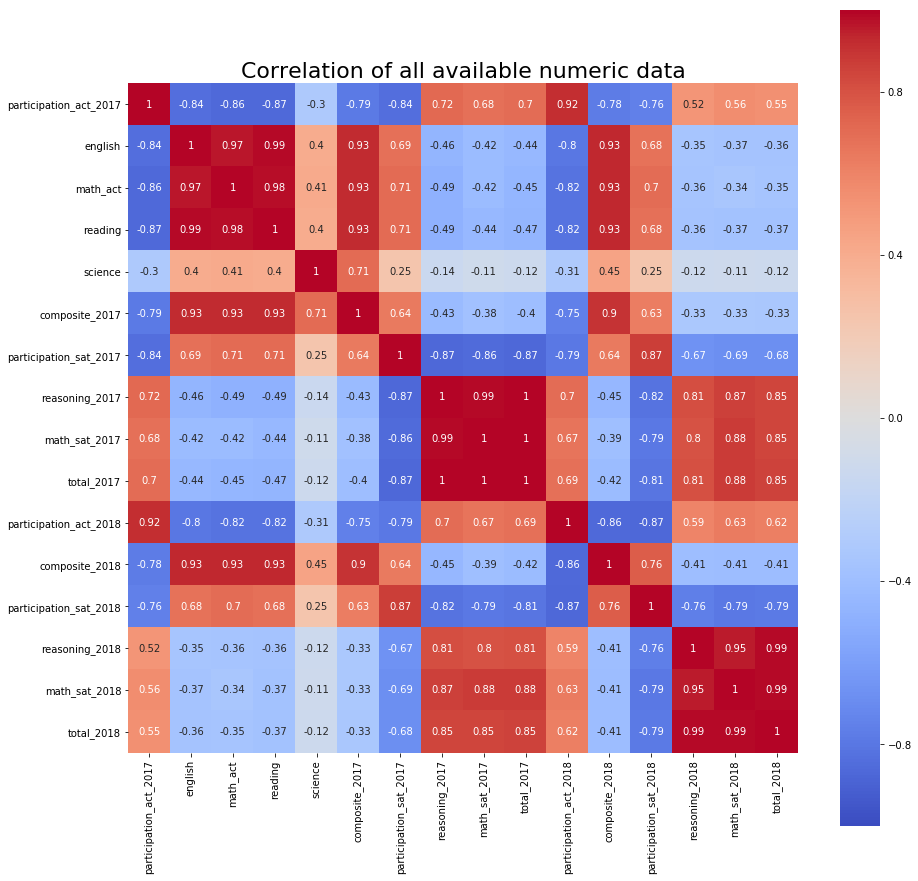

In [72]:
plt.figure(figsize=(15,15))
sns.heatmap(df_final.corr(),annot = True, cmap = 'coolwarm',vmin = -1, vmax = 1,square = True)
plt.title("Correlation of all available numeric data", size = 22);

In [73]:
df_final.loc[df_final['state']=='Maine',]

,state,participation_act_2017,english,math_act,reading,science,composite_2017,participation_sat_2017,reasoning_2017,math_sat_2017,total_2017,participation_act_2018,composite_2018,participation_sat_2018,reasoning_2018,math_sat_2018,total_2018
19,Maine,8.0,24.2,24.0,24.8,23.7,24.2,95.0,513,499,1012.0,7.0,24.0,99.0,512,501,1013.0


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [74]:
# def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#     nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
#     ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         ax[i].hist(dataframe[column]) # feel free to add more settings
#         # Set titles, labels, etc here for each subplot

In [111]:
def subplot_histograms(dataframe, list_of_columns,nbins=10):
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows    
    plt.figure(figsize=(16,16))
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        axl = plt.subplot(nrows,2,i+1)
        axl.set_title(' '.join(list_of_columns[i].upper().split('_')),size=20)
        axl.hist(dataframe[column],bins=nbins)
    plt.tight_layout()
    return

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

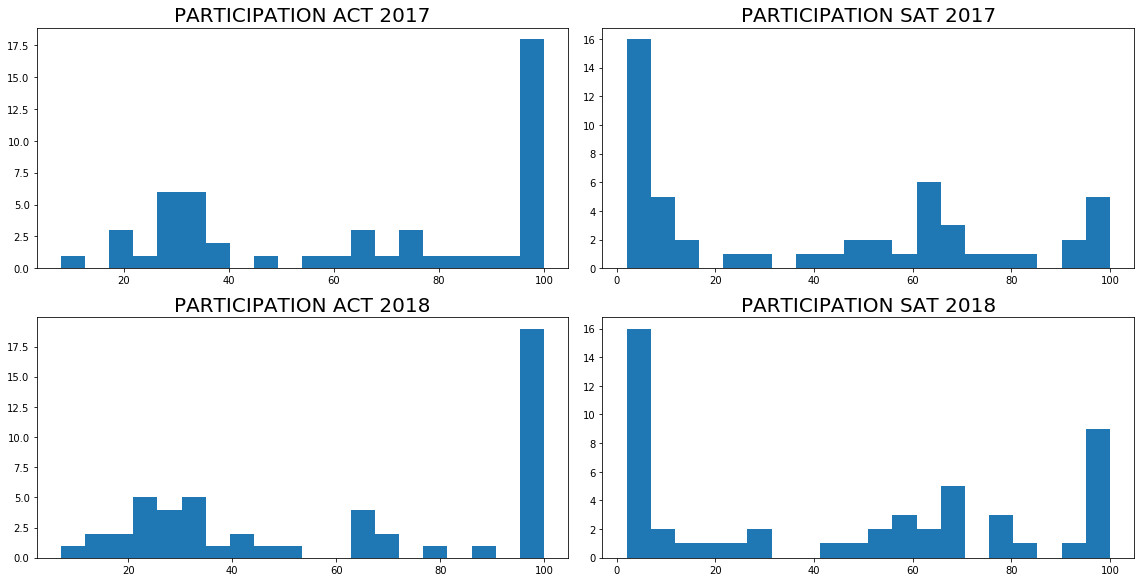

In [113]:
# Code
list_of_columns = [item for item in df_final.columns if 'participation' in item]
nbins=20
subplot_histograms(df_final,list_of_columns,nbins)

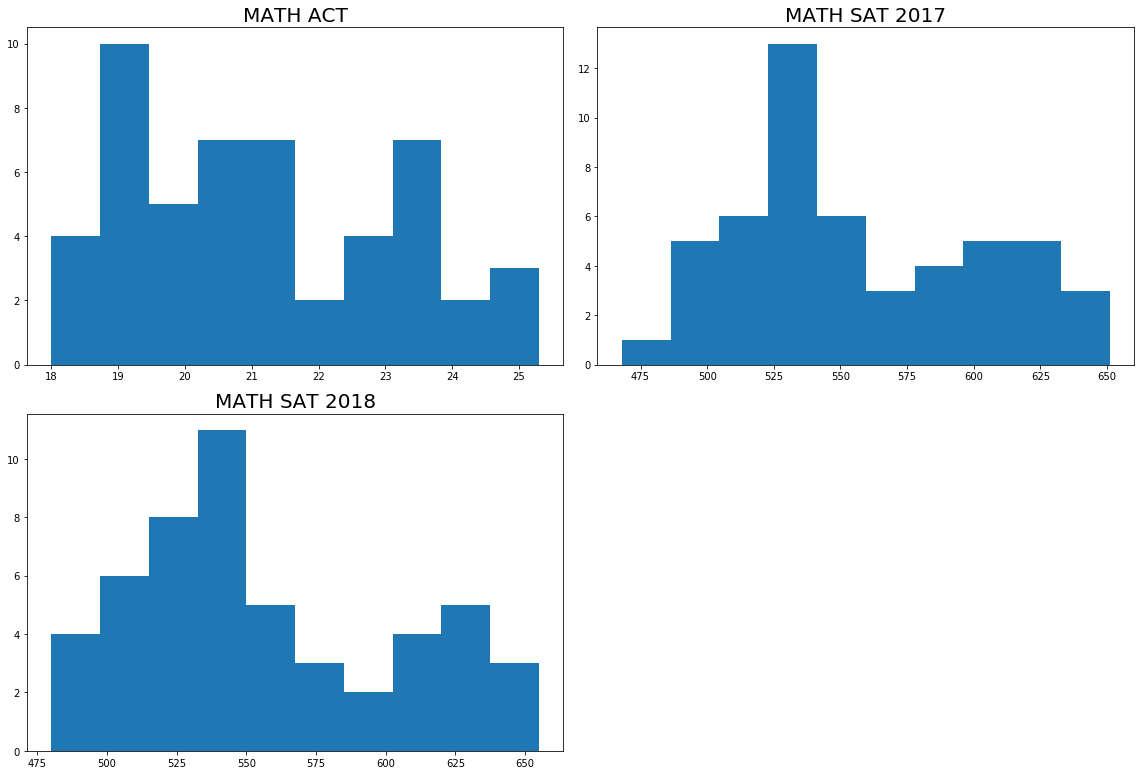

In [114]:
list_of_columns = [item for item in df_final.columns if 'math' in item]
nbins=10
subplot_histograms(df_final,list_of_columns)

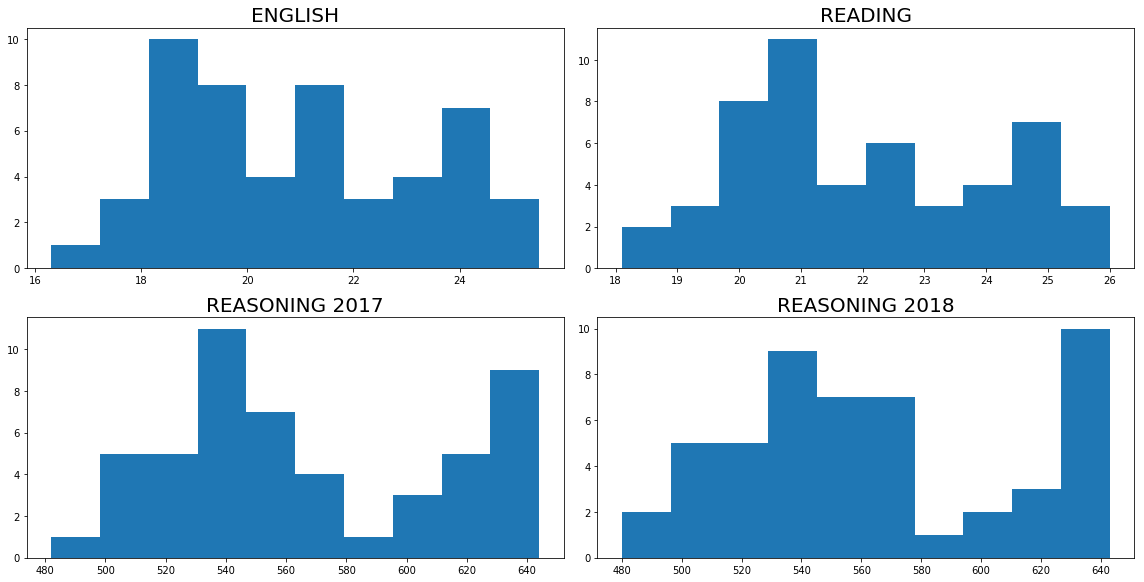

In [78]:
list_of_columns = [item for item in df_final.columns if (('english' in item) or ('reading' in item) or ('reasoning' in item))]
nbins=10
subplot_histograms(df_final,list_of_columns)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [79]:
# Function to make scatter plots
def subplot_scatter(dataframe, x_variable, y_variable):#, list_of_titles, list_of_xlabels):
    plt.figure(figsize=(7,7))
    plt.subplot(111)
    plt.scatter(df_final[x_variable],df_final[y_variable],marker='s',s=28)
    plt.xlabel(' '.join(x_variable.upper().split('_')),size=18)
    plt.ylabel(' '.join(y_variable.upper().split('_')),size=18)
    plt.title(' '.join(x_variable.upper().split('_'))+' v/s '+' '.join(y_variable.upper().split('_')),size=22)
    plt.tight_layout()
    return

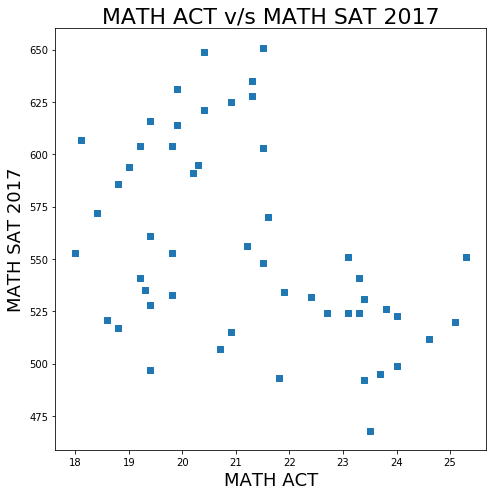

In [80]:
#SAT vs. ACT math scores for 2017
subplot_scatter(df_final,'math_act','math_sat_2017')

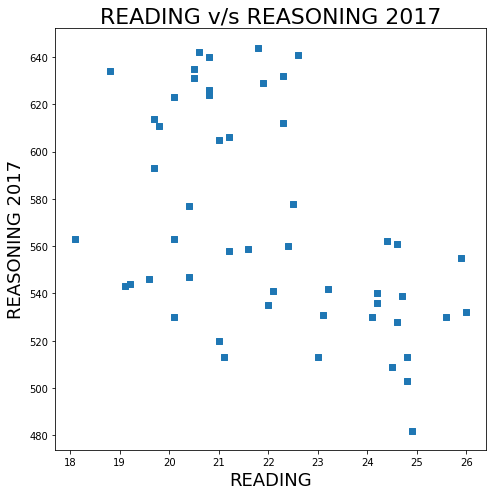

In [81]:
# SAT vs. ACT verbal/reading scores for 2017
# reasoning here is the SAT equivalent
# reading is the ACT score of 2017
subplot_scatter(df_final,'reading','reasoning_2017')

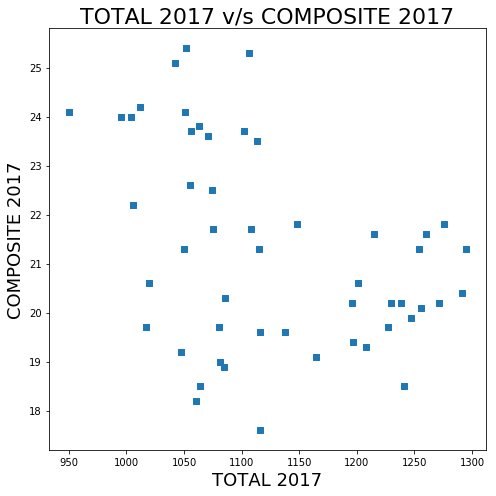

In [82]:
# SAT vs. ACT total/composite scores for 2017
subplot_scatter(df_final,'total_2017','composite_2017')

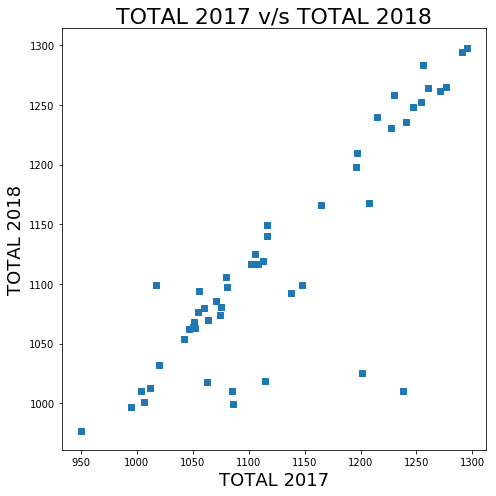

In [83]:
# Total scores for SAT 2017 vs. 2018
subplot_scatter(df_final,'total_2017','total_2018')

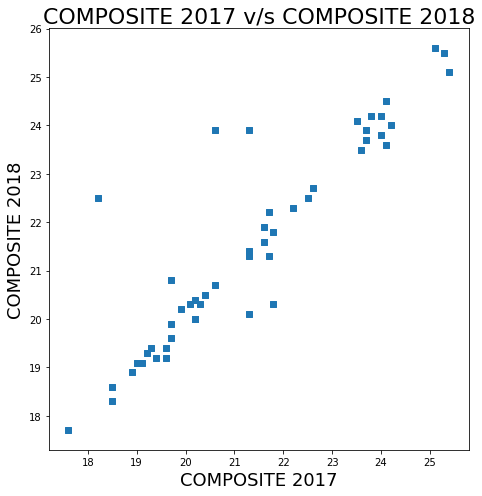

In [84]:
# Composite scores for ACT 2017 vs. 2018
subplot_scatter(df_final,'composite_2017','composite_2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [117]:
# Function to create boxplots
def subplot_boxplot(dataframe, column_name):#, list_of_titles, list_of_xlabels):
    plt.figure(figsize=(5,5))
    sns.boxplot(data=dataframe[column_name],color='orange')
    plt.title(' '.join(column_name.upper().split('_')),size=22)
    plt.tight_layout()
    return

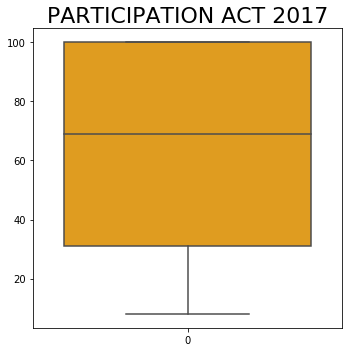

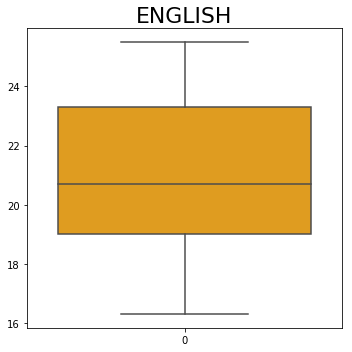

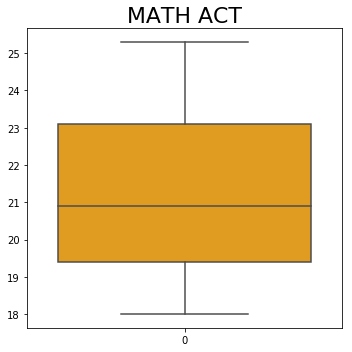

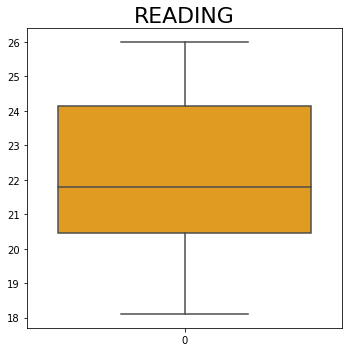

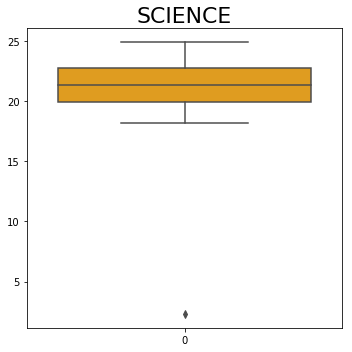

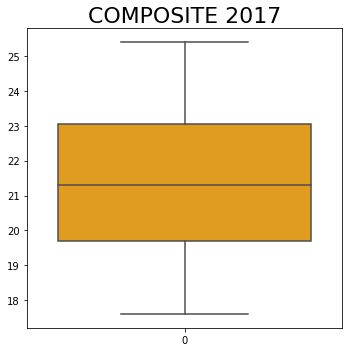

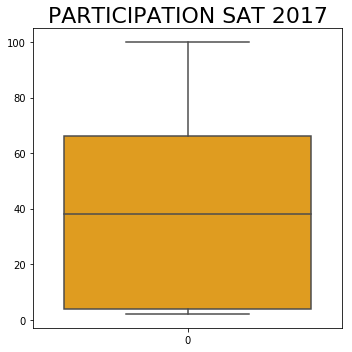

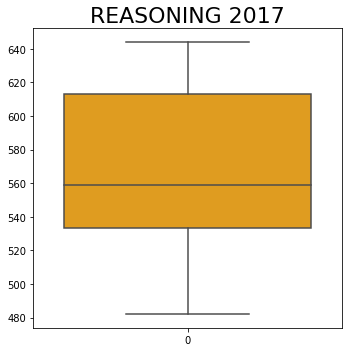

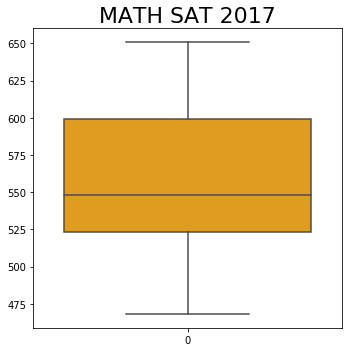

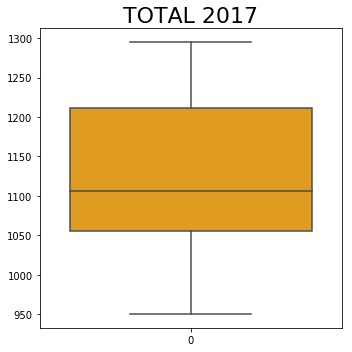

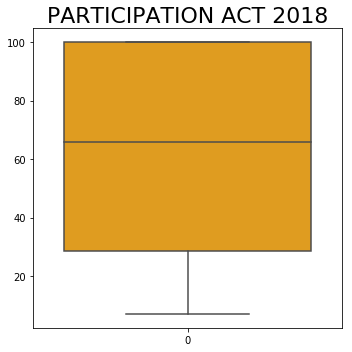

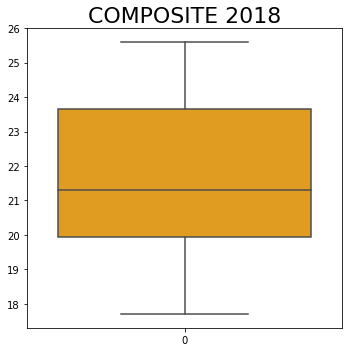

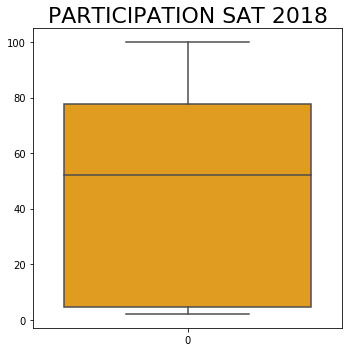

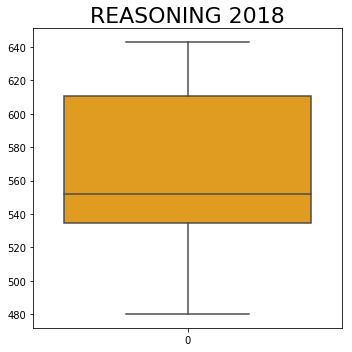

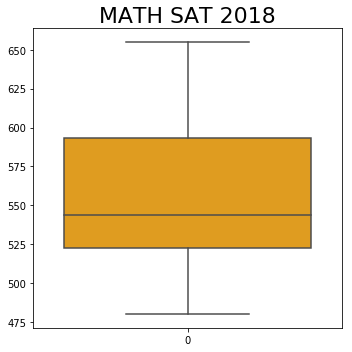

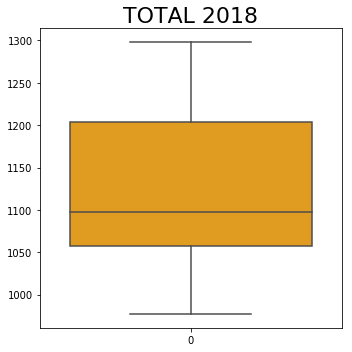

In [118]:
for item in df_final.select_dtypes(include=['int','float']):
    subplot_boxplot(df_final,item)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [87]:
df_final[[item for item in df_final.columns if 'participation' in item]].describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_2017,51.0,65.254902,32.140842,8.0,31.0,69.0,100.0,100.0
participation_sat_2017,51.0,39.803922,35.276632,2.0,4.0,38.0,66.0,100.0
participation_act_2018,51.0,61.725490,34.037085,7.0,28.5,66.0,100.0,100.0
participation_sat_2018,51.0,45.745098,37.314256,2.0,4.5,52.0,77.5,100.0


In [88]:
df_final[[item for item in df_final.columns if 'math' in item]].describe().T

,count,mean,std,min,25%,50%,75%,max
math_act,51.0,21.182353,1.981989,18.0,19.4,20.9,23.1,25.3
math_sat_2017,51.0,556.882353,47.121395,468.0,523.5,548.0,599.0,651.0
math_sat_2018,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0


In [89]:
df_final[[item for item in df_final.columns if ('reading' in item) or ('reasoning' in item) or ('english' in item)]].describe().T

,count,mean,std,min,25%,50%,75%,max
english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
reasoning_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
reasoning_2018,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0


In [90]:
# sns.distplot(stocks[stocks['ticker'] == 'SBUX']['close'], bins=10, kde = True);
def distplots(dataframe,list_of_columns):
    for column_name in list_of_columns:
        plt.figure(figsize=(5,5))
        sns.distplot(dataframe[column_name],bins=15,norm_hist=True,kde=True)
        plt.title(' '.join(column_name.upper().split('_')),size=22)
        plt.tight_layout()
    return

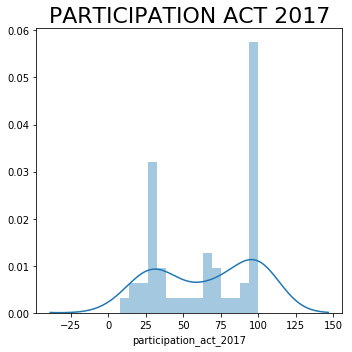

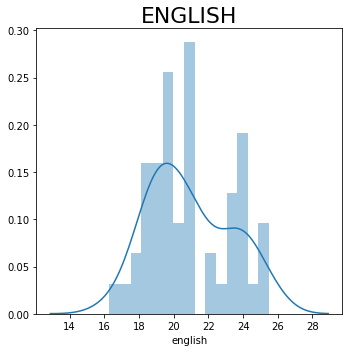

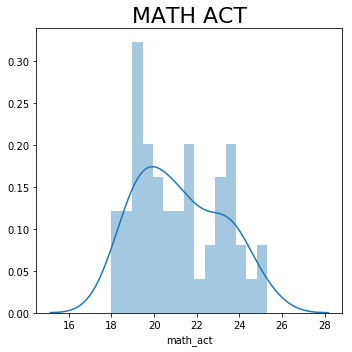

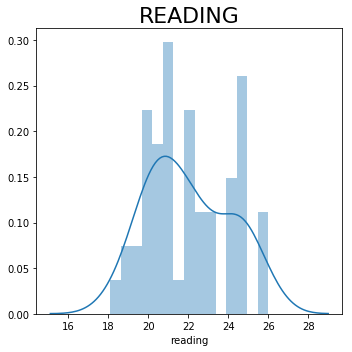

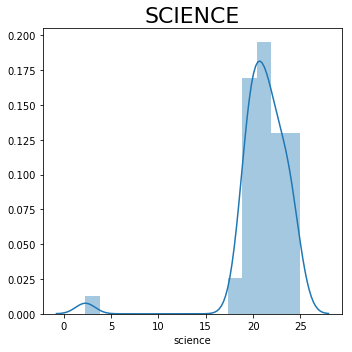

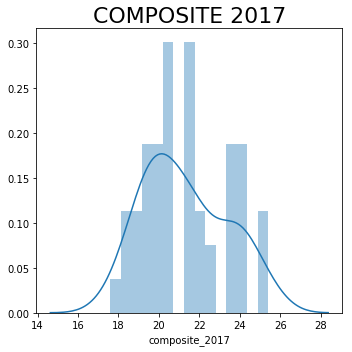

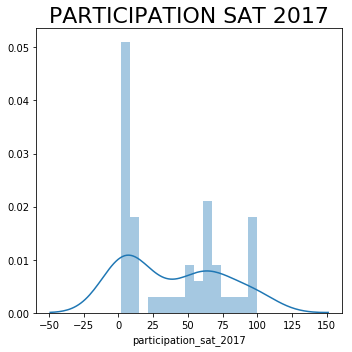

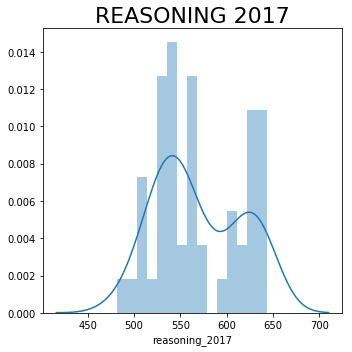

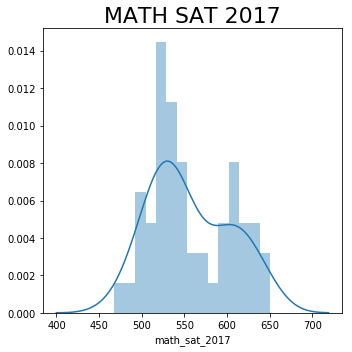

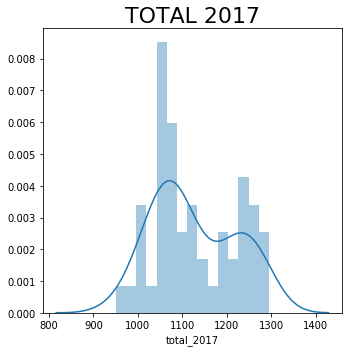

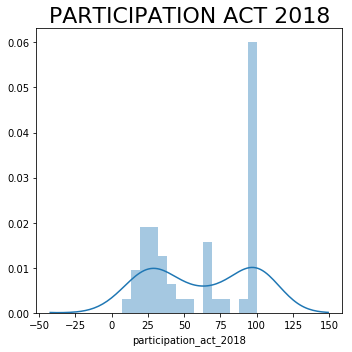

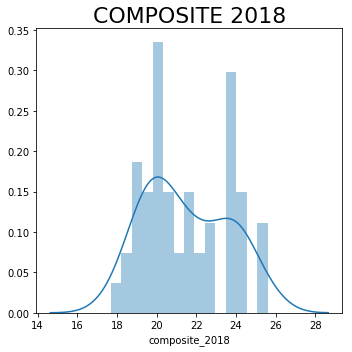

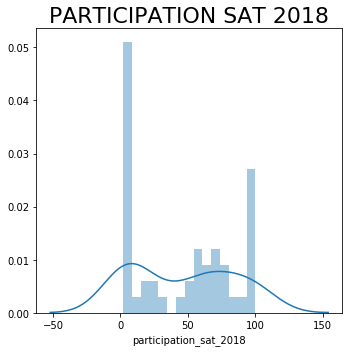

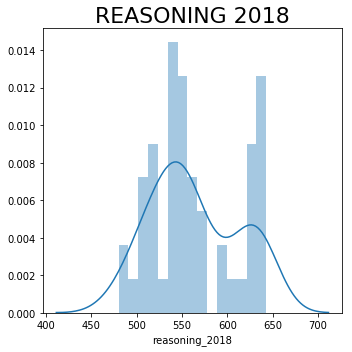

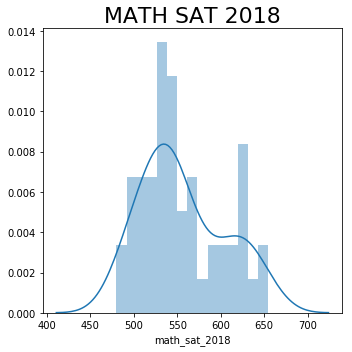

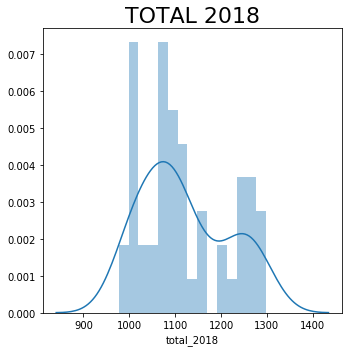

In [91]:
list_of_columns = [item for item in df_final.select_dtypes(include=['int','float'])]
distplots(df_final,list_of_columns,)

Answers: 
- ```participation_act_2017```, ```participation_act_2018```:
This distribution has two peaks corresponding two lower and higher participation limits. There is a symmetry but the two peaks makes it less similar to a Gaussian as observed from the kde. From the histogram, we can see a concentration at low participation rates and high participation rates as expected

- ```english```, ```math```, ```reading```, ```science```, ```composite2017```, ```composite2018```:
These are the scores in ACT 2017 and ACT 2018, they have a symmetry showing a closer to Gaussian behavior. The ```science``` has an outlier as can be seen in the histogram and the boxplot. 

- ```participation_sat_2017```, ```participation_sat_2018```:
These distribution similar trend as the ACT participation rates. Showing the possibility of either high participation or low participation. 

- ```reasoning_2017```, ```reasonong_2018```, ```math_sat_2017```, ```math_sat_2018```:
These scores correspond to the SATs and as expected, the scores show a similar to ACT, almost Gaussian trend. 




#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: The assumption is more appropriate for sampling exam scores but not for sampling the participation rates.

Does This Assumption Hold for:
    - Math
    Yes
    - Reading
    Yes
    - Rates
    No
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
The same as mentioned above. 
The assumption holds for exam scores but not for the rates. The rates seem to have other parameters making the behavior less random as shown by their twin peak beahvior. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

count     51.000000
mean      65.254902
std       32.140842
min        8.000000
25%       31.000000
50%       69.000000
75%      100.000000
max      100.000000
Name: participation_act_2017, dtype: float64
count     51.000000
mean      39.803922
std       35.276632
min        2.000000
25%        4.000000
50%       38.000000
75%       66.000000
max      100.000000
Name: participation_sat_2017, dtype: float64


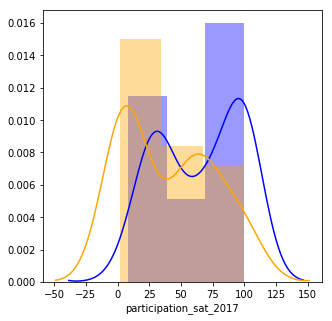

In [92]:
print(df_final.participation_act_2017.describe())
print(df_final.participation_sat_2017.describe())
plt.figure(figsize=(5,5))
sns.distplot(df_final.participation_act_2017,label='Rate ACT 2017',color='blue')
sns.distplot(df_final.participation_sat_2017,label='Rate SAT 2017',color='orange');
# plt.legend('upper right');

Answer:
As maybe observed from the data description and the comparative histograms, we can see that the ACT exam is more popular, showing more states with a higher participation rates. This is also clear from the median or 50% percentile, ACT has a 69% median rate while SAT has only 38% median rate. 
The spread, mean and deviations of these exam rate dist are however comparable and in similar order of magnitude.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

count    51.000000
mean     21.182353
std       1.981989
min      18.000000
25%      19.400000
50%      20.900000
75%      23.100000
max      25.300000
Name: math_act, dtype: float64
count     51.000000
mean     556.882353
std       47.121395
min      468.000000
25%      523.500000
50%      548.000000
75%      599.000000
max      651.000000
Name: math_sat_2017, dtype: float64


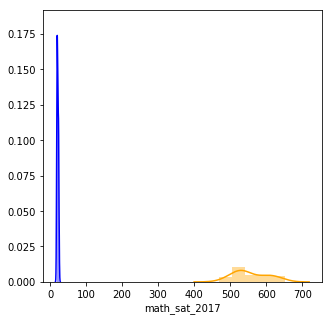

In [93]:
print(df_final.math_act.describe())
print(df_final.math_sat_2017.describe())
plt.figure(figsize=(5,5))
sns.distplot(df_final.math_act,label='Math ACT 2017',color='blue')
sns.distplot(df_final.math_sat_2017,label=' SAT 2017',color='orange');
# plt.legend('upper right');

Answer:It is not fair to compare, as these scores on a different scale and their scoring strategies differ. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [94]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [121]:
names = ['state','participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018']
df_final[names].sort_values(by=names[1],ascending=False)#.head(20)

,state,participation_act_2017,participation_act_2018,participation_sat_2017,participation_sat_2018
0,Alabama,100.0,100.0,5.0,6.0
17,Kentucky,100.0,100.0,4.0,4.0
49,Wisconsin,100.0,100.0,3.0,3.0
44,Utah,100.0,100.0,3.0,4.0
42,Tennessee,100.0,100.0,5.0,6.0
40,South Carolina,100.0,100.0,50.0,55.0
36,Oklahoma,100.0,100.0,7.0,8.0
33,North Carolina,100.0,100.0,49.0,52.0
28,Nevada,100.0,100.0,26.0,23.0
26,Montana,100.0,100.0,10.0,10.0


In [ ]:
df_final[]

Three states that I find interesting are the following:
- Colorado:
In ACT 2017 Colorado had a 100% participation that dropped to 30% in 2018 and in the meantione SAT participation went from 11% in 2017 to 100% in 2018. This is clearly due to the change in policy of Coloarado which made SAT mandatory starting in 2017, hence you see this drastic change.
[https://www.testive.com/colorado-sat-change-2017/]

- Florida:
FLorida has a trend that both ACT and SAT participations have dropped significantly. ACT has dropped from 73% to 66%, while SAT dropped further from 83% to 56%. This contradicts, however, to that reported in this article, [https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html] which cites an increase in SAT take to 97% but agrees to the trend of Florida students generally falling behind on ACT and SAT. The newspaper article justifies the increase due to free test sessions that many schools offered.

- Ohio and Nebraska:
These two states have seen significant increase in the ACT participation in 2018 from 2017. They have respectively increased from 75% and 84% respectively. Nebraska chose ACT as the state wide exam and offered PreACT sessions for 2018 which might explain the increase to 100% [https://www.education.ne.gov/assessment/act/]. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

- The key take away from my understanding of the data and some online material is that ACT and SAT exams are administered through state policies which play a big role in the participation rates. 
- Anohter factor that seems to encourage participation is the offer of free preparation sessions or exams which make one test more approachable than the other. 